# Local Correlation Integral
LOCI is a density-based outlier detection algorithm that goes beyond simple distance or density measures by providing a multi-granular approach to outlier detection. The key innovation is that it doesn't require a fixed neighborhood size - it evaluates points at all scales simultaneously.


Most methods (like LOF): Use a fixed neighborhood size (k)

LOCI: Evaluates points across all possible neighborhood sizes

Provides automatic, data-driven outlier detection without parameter tuning

Mathematical Foundation
1. Core Definitions
α-Neighborhood:


``` N(x, α) = {y ∈ D | dist(x, y) ≤ α} ```
Points within distance α from x

Counting Neighborhood:


``` n(x, α) = |N(x, α)| ```
Number of points in α-neighborhood

2. Multi-Granular Deviation (MGD)
The fundamental measure in LOCI:


``` MGD(x, r, α) = n(x, α·r) / n(x, r) ```
Where:

r = base radius

α = scaling factor (typically α = 1/√2 or α = 0.5)

n(x, r) = points within radius r of x

n(x, α·r) = points within radius α·r of x

3. Local Correlation Integral (LOCI) Score

``` σ_MGD(x, r) = standard deviation of MGD for all points in N(x, r) MDEF(x, r, α) = 1 - (n(x, α·r) / avg_n(α·r))  ```
Where:

 avg_n(α·r) = average of n(y, α·r) for all y in N(x, r) 

Outlier Detection Rule:


``` If MDEF(x, r, α) > k·σ_MDEF(x, r, α) for some r   then x is an outlier ```
Where:

k = typically 3 (like 3-sigma rule)

The algorithm tests all r values up to some maximum

## Step-by-Step Example
``` bash
Let's use a simple 1D example to understand:

Dataset: [1, 1.5, 2, 2.5, 3, 3.5, 4, 10]
Outlier: 10

Parameters: α = 0.5, k = 3

Step 1: For point 10, calculate at various radii r
Let's take r = 2:


N(10, 2) = points within distance 2 from 10 = {10} only
n(10, 2) = 1

N(10, 1) = points within distance 1 from 10 = {10} only  (α·r = 0.5×2 = 1)
n(10, 1) = 1
Step 2: Calculate for neighbors
For the cluster points (1-4):
At r = 2, α·r = 1:

For point 3 (in the dense cluster):


N(3, 2) = points within distance 2 = {1.5, 2, 2.5, 3, 3.5, 4} = 6 points
N(3, 1) = points within distance 1 = {2, 2.5, 3, 3.5} = 4 points
Step 3: Calculate MDEF
For point 10 at r=2:


n(10, 1) = 1
avg_n(1) for neighbors = ??? (but 10 has no neighbors!)
The key insight: For isolated points like 10, when we look at their neighborhood, they have very few or no neighbors, so their local density estimate is unreliable or zero.

```

=== Example 1: Simple 2D Dataset ===
Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 147.74it/s]

Total points: 356
Outliers detected: 40

=== Point Explanations ===
Point 350 (true outlier): Point 350 has MDEF = 1.000 at radius 10.000, which is 6.2σ above local average
Point 351 (true outlier): Point 351 has MDEF = 1.000 at radius 10.000, which is 51.6σ above local average
Point 352 (true outlier): Point 352 has consistent density with neighbors (max MDEF = 0.000)
Point 353 (true outlier): Point 353 has consistent density with neighbors (max MDEF = 0.000)
Point 354 (true outlier): Point 354 has MDEF = 1.000 at radius 6.581, which is infσ above local average
Point 355 (true outlier): Point 355 has MDEF = 1.000 at radius 10.000, which is 3.6σ above local average



C:\Users\User\AppData\Local\Temp\ipykernel_16544\1681051538.py:184: RuntimeWarning: divide by zero encountered in scalar divide
  f"{explanation['critical_mdef']/explanation['critical_sigma']:.1f}σ "


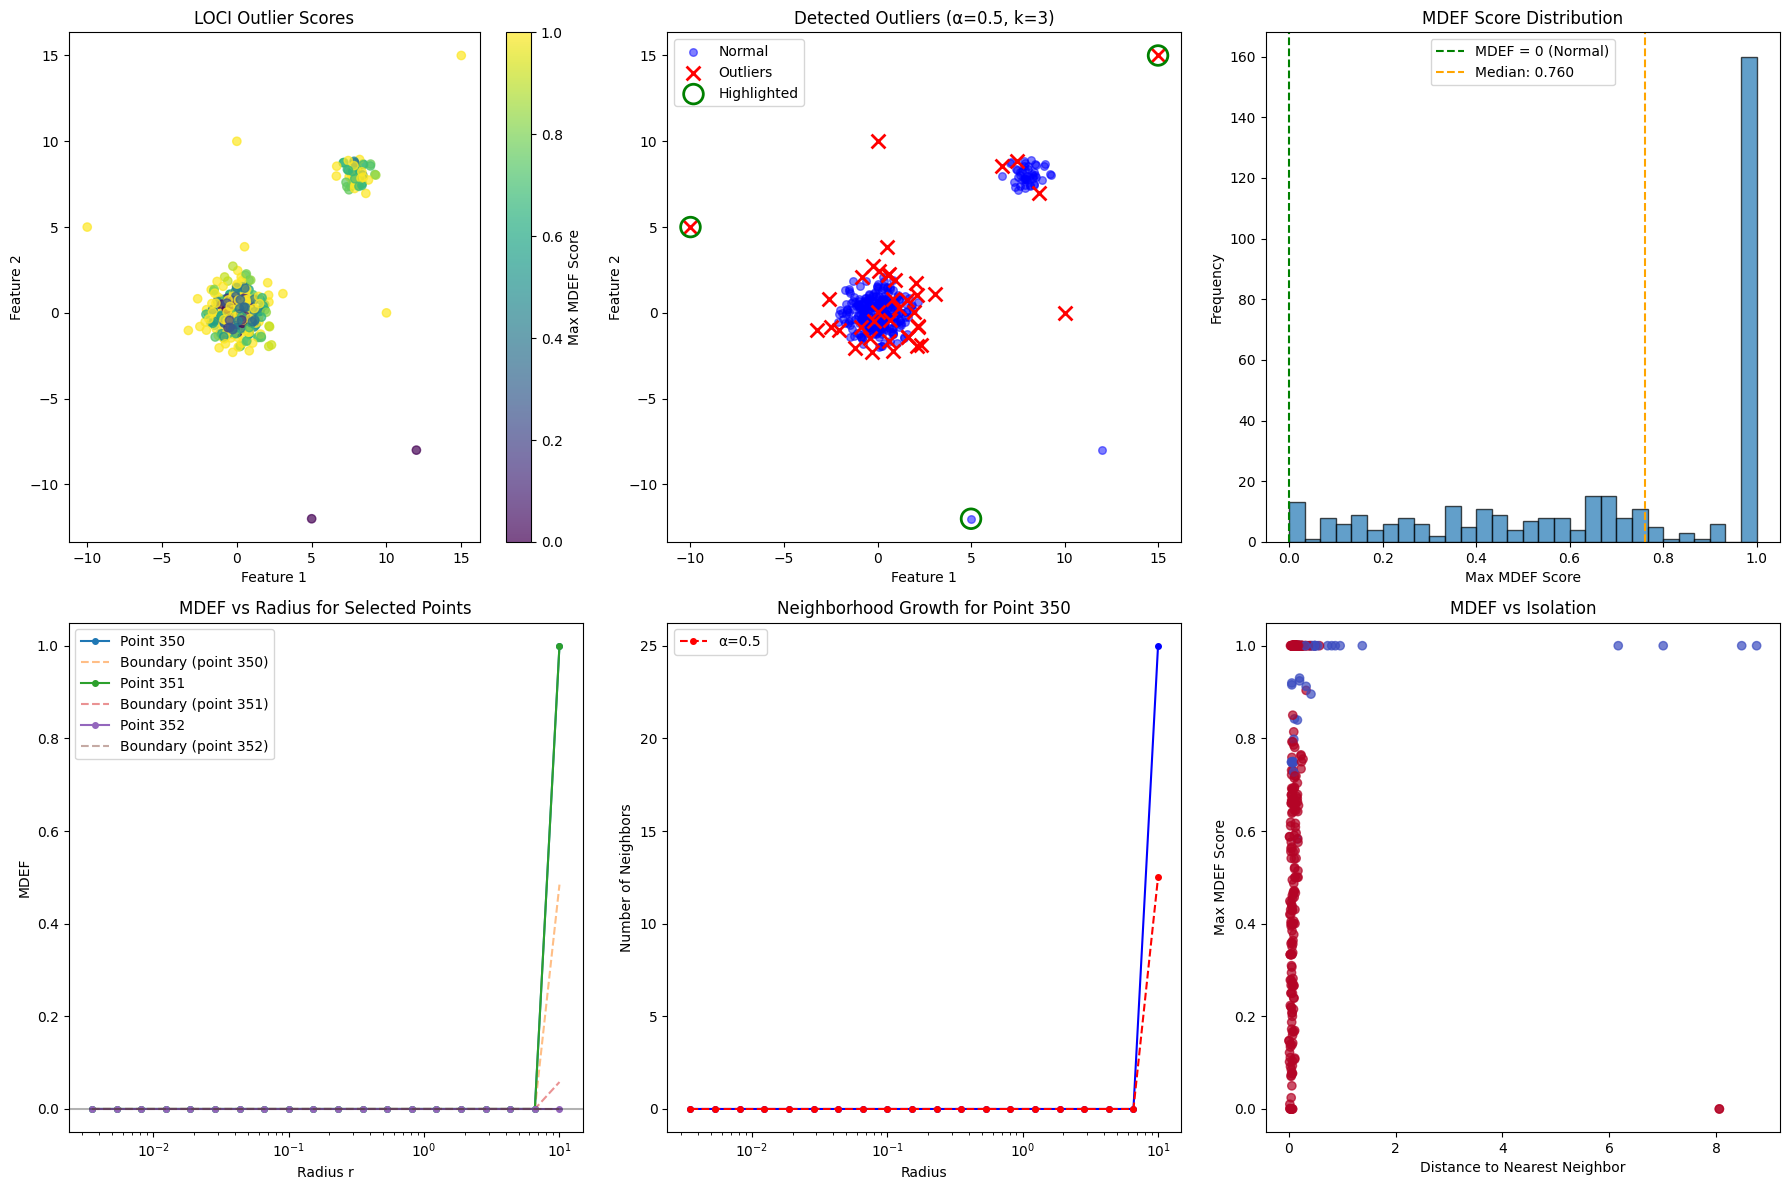


=== Example 2: Sensitivity to α Parameter ===
Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 109.33it/s]


α=0.3: Detected 31 outliers, avg MDEF=0.762
Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 115.48it/s]


α=0.5: Detected 40 outliers, avg MDEF=0.698
Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 130.34it/s]


α=0.7: Detected 52 outliers, avg MDEF=0.628
Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 158.63it/s]


α=0.9: Detected 62 outliers, avg MDEF=0.523

=== Example 3: Credit Card Fraud Detection ===
Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 40.34it/s]



Credit Card Fraud Detection Results:
              precision    recall  f1-score   support

      Normal       0.98      0.16      0.27      1000
       Fraud       0.02      0.80      0.04        20

    accuracy                           0.17      1020
   macro avg       0.50      0.48      0.15      1020
weighted avg       0.96      0.17      0.27      1020

Confusion Matrix:
[[159 841]
 [  4  16]]
Fraud Detection Rate: 16/20 = 80.00%
False Positive Rate: 841/1000 = 84.10%
ROC AUC: 0.710

=== Adaptive LOCI Example ===
Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 221.23it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 225.57it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 230.69it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 224.02it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 225.74it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 194.08it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 200.74it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 216.53it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 228.30it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 189.72it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 218.35it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 220.82it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 221.86it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 192.80it/s]


Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 210.87it/s]


Selected parameters: α=0.3, k=2
Computing pairwise distances...
Determining analysis radii...
Performing multi-granular analysis...


100%|██████████| 20/20 [00:00<00:00, 139.97it/s]

Adaptive LOCI detected 64 outliers


In [2]:
import numpy as np
from scipy.spatial import KDTree
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as  pd

class LOCI:
    """
    Local Correlation Integral (LOCI) implementation
    """
    
    def __init__(self, alpha=0.5, k_sigma=3, max_radius=None, min_neighbors=10):
        """
        Initialize LOCI detector
        
        Parameters:
        -----------
        alpha : float, default=0.5
            Scaling factor for multi-granular analysis
        k_sigma : float, default=3
            Number of standard deviations for outlier threshold
        max_radius : float, optional
            Maximum radius to consider (auto-determined if None)
        min_neighbors : int, default=10
            Minimum neighbors to consider a point for analysis
        """
        self.alpha = alpha
        self.k_sigma = k_sigma
        self.max_radius = max_radius
        self.min_neighbors = min_neighbors
        self.tree_ = None
        self.mdef_scores_ = None
        self.outlier_flags_ = None
        
    def _compute_pairwise_distances(self, X):
        """Compute pairwise distances efficiently"""
        from scipy.spatial.distance import pdist, squareform
        return squareform(pdist(X))
    
    def _determine_radii(self, distances):
        """Determine appropriate radii for analysis"""
        if self.max_radius is None:
            # Use median of non-zero distances as max radius
            flat_dist = distances.flatten()
            non_zero_dist = flat_dist[flat_dist > 0]
            self.max_radius_ = np.median(non_zero_dist) * 2
        else:
            self.max_radius_ = self.max_radius
        
        # Create radii from min to max
        min_radius = np.min(distances[distances > 0])
        n_radii = 20  # Number of radii to test
        self.radii_ = np.logspace(np.log10(min_radius), 
                                 np.log10(self.max_radius_), 
                                 n_radii)
        return self.radii_
    
    def _count_neighbors(self, distances, radius):
        """Count neighbors within given radius for all points"""
        return np.sum(distances <= radius, axis=1) - 1  # Exclude self
    
    def fit_predict(self, X):
        """
        Fit LOCI model and predict outliers
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Input data
            
        Returns:
        --------
        outlier_flags : array of shape (n_samples,)
            -1 for outliers, 1 for inliers
        """
        X = np.asarray(X)
        n_samples = X.shape[0]
        
        # Build KDTree for efficient radius queries
        self.tree_ = KDTree(X)
        
        # Compute pairwise distances
        print("Computing pairwise distances...")
        distances = self._compute_pairwise_distances(X)
        
        # Determine radii for analysis
        print("Determining analysis radii...")
        radii = self._determine_radii(distances)
        
        # Initialize results arrays
        all_mdef = []
        all_sigma_mdef = []
        all_outlier_flags = np.zeros(n_samples, dtype=int)
        
        print("Performing multi-granular analysis...")
        # For each radius, compute MDEF
        for r_idx, r in enumerate(tqdm(radii)):
            alpha_r = self.alpha * r
            
            # Count neighbors for each point at radius r and alpha*r
            n_r = self._count_neighbors(distances, r)
            n_alpha_r = self._count_neighbors(distances, alpha_r)
            
            # Avoid division by zero
            n_r = np.maximum(n_r, 1)
            
            # Compute average n_alpha_r in neighborhood for each point
            avg_n_alpha_r = np.zeros(n_samples)
            
            for i in range(n_samples):
                # Find neighbors within radius r
                neighbor_indices = np.where(distances[i] <= r)[0]
                neighbor_indices = neighbor_indices[neighbor_indices != i]  # Exclude self
                
                if len(neighbor_indices) > 0:
                    avg_n_alpha_r[i] = np.mean(n_alpha_r[neighbor_indices])
                else:
                    avg_n_alpha_r[i] = n_alpha_r[i]  # Only self
            
            # Compute MDEF (Multi-granular Deviation Factor)
            with np.errstate(divide='ignore', invalid='ignore'):
                mdef = 1 - (n_alpha_r / avg_n_alpha_r)
                mdef = np.nan_to_num(mdef, nan=0.0, posinf=0.0, neginf=0.0)
            
            # Compute standard deviation of MDEF in neighborhood
            sigma_mdef = np.zeros(n_samples)
            
            for i in range(n_samples):
                neighbor_indices = np.where(distances[i] <= r)[0]
                neighbor_indices = neighbor_indices[neighbor_indices != i]
                
                if len(neighbor_indices) > 0:
                    sigma_mdef[i] = np.std(mdef[neighbor_indices])
                else:
                    sigma_mdef[i] = 0
            
            # Flag outliers at this radius
            outlier_mask = (mdef > self.k_sigma * sigma_mdef) & (n_r >= self.min_neighbors)
            all_outlier_flags[outlier_mask] = -1
            
            all_mdef.append(mdef)
            all_sigma_mdef.append(sigma_mdef)
        
        # Convert to numpy arrays
        self.mdef_scores_ = np.array(all_mdef).T  # Shape: (n_samples, n_radii)
        self.sigma_mdef_ = np.array(all_sigma_mdef).T
        self.radii_ = radii
        
        # Final outlier decision: outlier at any radius
        self.outlier_flags_ = np.where(all_outlier_flags == -1, -1, 1)
        self.outlier_scores_ = np.max(self.mdef_scores_, axis=1)
        
        return self.outlier_flags_
    
    def explain_point(self, point_index, radius_index=None):
        """
        Explain why a point was flagged as outlier
        """
        if self.mdef_scores_ is None:
            raise ValueError("Must fit model first")
        
        explanation = {
            'point_index': point_index,
            'is_outlier': self.outlier_flags_[point_index] == -1,
            'max_mdef': self.outlier_scores_[point_index],
            'mdef_across_radii': self.mdef_scores_[point_index],
            'sigma_across_radii': self.sigma_mdef_[point_index]
        }
        
        # Find radius with maximum MDEF
        if radius_index is None:
            radius_index = np.argmax(self.mdef_scores_[point_index])
        
        explanation['critical_radius'] = self.radii_[radius_index]
        explanation['critical_alpha_radius'] = self.alpha * self.radii_[radius_index]
        explanation['critical_mdef'] = self.mdef_scores_[point_index, radius_index]
        explanation['critical_sigma'] = self.sigma_mdef_[point_index, radius_index]
        
        # Interpretation
        if explanation['is_outlier']:
            explanation['interpretation'] = (
                f"Point {point_index} has MDEF = {explanation['critical_mdef']:.3f} "
                f"at radius {explanation['critical_radius']:.3f}, which is "
                f"{explanation['critical_mdef']/explanation['critical_sigma']:.1f}σ "
                "above local average"
            )
        else:
            explanation['interpretation'] = (
                f"Point {point_index} has consistent density with neighbors "
                f"(max MDEF = {explanation['max_mdef']:.3f})"
            )
        
        return explanation
    
    def visualize(self, X, highlight_points=None):
        """
        Visualize LOCI results
        """
        if self.mdef_scores_ is None:
            raise ValueError("Must fit model first")
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Plot 1: Data points colored by outlier score
        scatter1 = axes[0, 0].scatter(X[:, 0], X[:, 1], 
                                     c=self.outlier_scores_, 
                                     cmap='viridis', alpha=0.7)
        plt.colorbar(scatter1, ax=axes[0, 0], label='Max MDEF Score')
        axes[0, 0].set_title('LOCI Outlier Scores')
        axes[0, 0].set_xlabel('Feature 1')
        axes[0, 0].set_ylabel('Feature 2')
        
        # Plot 2: Outliers highlighted
        normal_mask = self.outlier_flags_ == 1
        outlier_mask = self.outlier_flags_ == -1
        
        axes[0, 1].scatter(X[normal_mask, 0], X[normal_mask, 1],
                          c='blue', alpha=0.5, s=30, label='Normal')
        axes[0, 1].scatter(X[outlier_mask, 0], X[outlier_mask, 1],
                          c='red', s=100, marker='x', linewidth=2, label='Outliers')
        
        if highlight_points is not None:
            axes[0, 1].scatter(X[highlight_points, 0], X[highlight_points, 1],
                              facecolors='none', edgecolors='green', s=200,
                              linewidth=2, label='Highlighted')
        
        axes[0, 1].set_title(f'Detected Outliers (α={self.alpha}, k={self.k_sigma})')
        axes[0, 1].set_xlabel('Feature 1')
        axes[0, 1].set_ylabel('Feature 2')
        axes[0, 1].legend()
        
        # Plot 3: MDEF score distribution
        axes[0, 2].hist(self.outlier_scores_, bins=30, alpha=0.7, edgecolor='black')
        axes[0, 2].axvline(0, color='green', linestyle='--', label='MDEF = 0 (Normal)')
        axes[0, 2].axvline(np.median(self.outlier_scores_), color='orange', 
                          linestyle='--', label=f'Median: {np.median(self.outlier_scores_):.3f}')
        axes[0, 2].set_title('MDEF Score Distribution')
        axes[0, 2].set_xlabel('Max MDEF Score')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].legend()
        
        # Plot 4: MDEF vs Radius for highlighted points
        if highlight_points is not None:
            for idx in highlight_points[:3]:  # Show first 3 highlighted points
                axes[1, 0].plot(self.radii_, self.mdef_scores_[idx], 
                               label=f'Point {idx}', marker='o', markersize=4)
                # Plot k*sigma boundary
                axes[1, 0].plot(self.radii_, 
                               self.k_sigma * self.sigma_mdef_[idx],
                               '--', alpha=0.5, label=f'Boundary (point {idx})')
            
            axes[1, 0].axhline(0, color='black', linestyle='-', alpha=0.3)
            axes[1, 0].set_xlabel('Radius r')
            axes[1, 0].set_ylabel('MDEF')
            axes[1, 0].set_title('MDEF vs Radius for Selected Points')
            axes[1, 0].legend()
            axes[1, 0].set_xscale('log')
        
        # Plot 5: Neighborhood sizes at different radii
        sample_point = 0 if highlight_points is None else highlight_points[0]
        neighbor_counts = []
        
        # Count neighbors at each radius
        distances, _ = self.tree_.query(X[sample_point].reshape(1, -1), 
                                       k=len(X))
        
        for r in self.radii_:
            neighbor_counts.append(np.sum(distances[0] <= r) - 1)  # Exclude self
        
        axes[1, 1].plot(self.radii_, neighbor_counts, 'b-o', markersize=4)
        axes[1, 1].plot(self.radii_, np.array(neighbor_counts) * self.alpha, 
                       'r--o', markersize=4, label=f'α={self.alpha}')
        axes[1, 1].set_xlabel('Radius')
        axes[1, 1].set_ylabel('Number of Neighbors')
        axes[1, 1].set_title(f'Neighborhood Growth for Point {sample_point}')
        axes[1, 1].legend()
        axes[1, 1].set_xscale('log')
        
        # Plot 6: Correlation between MDEF and distance to nearest neighbor
        from sklearn.neighbors import NearestNeighbors
        nbrs = NearestNeighbors(n_neighbors=2).fit(X)
        distances, _ = nbrs.kneighbors(X)
        nearest_dist = distances[:, 1]  # Distance to nearest neighbor (excluding self)
        
        axes[1, 2].scatter(nearest_dist, self.outlier_scores_, 
                          c=self.outlier_flags_, cmap='coolwarm', alpha=0.7)
        axes[1, 2].set_xlabel('Distance to Nearest Neighbor')
        axes[1, 2].set_ylabel('Max MDEF Score')
        axes[1, 2].set_title('MDEF vs Isolation')
        
        plt.tight_layout()
        plt.show()

# Example 1: Simple dataset with clear outliers
print("=== Example 1: Simple 2D Dataset ===")
np.random.seed(42)

# Create main cluster
main_cluster = np.random.normal(0, 1, (300, 2))

# Create smaller cluster
small_cluster = np.random.normal(8, 0.5, (50, 2))

# Add isolated outliers
outliers = np.array([
    [15, 15],    # Far from everything
    [-10, 5],    # Far in negative x
    [5, -12],    # Far in negative y
    [12, -8],    # Far in diagonal
    [0, 10],     # Far in y-direction
    [10, 0]      # Far in x-direction
])

X = np.vstack([main_cluster, small_cluster, outliers])

# Apply LOCI
loci = LOCI(alpha=0.5, k_sigma=3, max_radius=10, min_neighbors=5)
outlier_flags = loci.fit_predict(X)

print(f"Total points: {len(X)}")
print(f"Outliers detected: {np.sum(outlier_flags == -1)}")

# Explain specific points
print("\n=== Point Explanations ===")
for i in range(len(outliers)):
    point_idx = len(main_cluster) + len(small_cluster) + i
    explanation = loci.explain_point(point_idx)
    print(f"Point {point_idx} (true outlier): {explanation['interpretation']}")

# Visualize results
highlight_indices = [len(main_cluster) + len(small_cluster) + i for i in range(3)]
loci.visualize(X, highlight_points=highlight_indices)

# Example 2: Sensitivity analysis for alpha parameter
print("\n=== Example 2: Sensitivity to α Parameter ===")

def analyze_alpha_sensitivity(X, alpha_values=[0.3, 0.5, 0.7, 0.9]):
    """
    Analyze how LOCI results change with different alpha values
    """
    results = []
    
    for alpha in alpha_values:
        loci = LOCI(alpha=alpha, k_sigma=3, max_radius=10, min_neighbors=5)
        outlier_flags = loci.fit_predict(X)
        
        n_outliers = np.sum(outlier_flags == -1)
        avg_mdef = np.mean(loci.outlier_scores_)
        
        results.append({
            'alpha': alpha,
            'n_outliers': n_outliers,
            'avg_mdef': avg_mdef,
            'max_mdef': np.max(loci.outlier_scores_),
            'outlier_ratio': n_outliers / len(X)
        })
        
        print(f"α={alpha}: Detected {n_outliers} outliers, "
              f"avg MDEF={avg_mdef:.3f}")
    
    return pd.DataFrame(results)

# Perform sensitivity analysis
alpha_results = analyze_alpha_sensitivity(X)

# Example 3: Real-world scenario - Credit Card Fraud Detection
print("\n=== Example 3: Credit Card Fraud Detection ===")

def simulate_credit_card_data(n_normal=1000, n_fraud=20):
    """
    Simulate credit card transaction data
    Features: [amount, time_since_last, location_distance, frequency]
    """
    np.random.seed(123)
    
    # Normal transactions
    normal_transactions = np.column_stack([
        np.random.exponential(50, n_normal),           # Amount (right-skewed)
        np.random.exponential(2, n_normal),            # Time since last transaction
        np.random.exponential(1, n_normal),            # Location distance
        np.random.poisson(3, n_normal)                 # Transaction frequency
    ])
    
    # Fraudulent transactions (different pattern)
    fraud_transactions = np.column_stack([
        np.random.exponential(500, n_fraud),           # Large amounts
        np.random.exponential(0.1, n_fraud),           # Very recent transactions
        np.random.exponential(100, n_fraud),           # Far locations
        np.random.poisson(10, n_fraud)                 # High frequency
    ])
    
    # Add labels
    y_true = np.array([0] * n_normal + [1] * n_fraud)
    
    return np.vstack([normal_transactions, fraud_transactions]), y_true

# Generate data
X_cc, y_true = simulate_credit_card_data()

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_cc_scaled = scaler.fit_transform(X_cc)

# Apply LOCI for fraud detection
loci_cc = LOCI(alpha=0.5, k_sigma=3, max_radius=5, min_neighbors=10)
y_pred = loci_cc.fit_predict(X_cc_scaled)

# Convert predictions (1 for normal, -1 for fraud)
y_pred_binary = (y_pred == 1).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\nCredit Card Fraud Detection Results:")
print(classification_report(y_true, y_pred_binary, 
                           target_names=['Normal', 'Fraud']))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)
print(f"Confusion Matrix:\n{cm}")
print(f"Fraud Detection Rate: {cm[1,1]}/{cm[1,:].sum()} = {cm[1,1]/cm[1,:].sum():.2%}")
print(f"False Positive Rate: {cm[0,1]}/{cm[0,:].sum()} = {cm[0,1]/cm[0,:].sum():.2%}")

# ROC AUC (using MDEF scores as continuous measure)
roc_auc = roc_auc_score(y_true, -loci_cc.outlier_scores_)
print(f"ROC AUC: {roc_auc:.3f}")

# Advanced: LOCI with adaptive parameters
class AdaptiveLOCI:
    """
    Enhanced LOCI with adaptive parameter selection
    """
    
    def __init__(self, alpha_range=(0.3, 0.7), k_sigma_range=(2, 4)):
        self.alpha_range = alpha_range
        self.k_sigma_range = k_sigma_range
        
    def fit_predict(self, X):
        """
        Adaptive LOCI that selects best parameters
        """
        from sklearn.model_selection import StratifiedKFold
        from sklearn.metrics import roc_auc_score
        
        # Generate parameter combinations
        param_combinations = []
        for alpha in np.linspace(self.alpha_range[0], self.alpha_range[1], 5):
            for k_sigma in range(self.k_sigma_range[0], self.k_sigma_range[1] + 1):
                param_combinations.append({'alpha': alpha, 'k_sigma': k_sigma})
        
        # For simplicity, we'll use a hold-out validation approach
        n_samples = len(X)
        split_idx = int(0.7 * n_samples)
        
        X_train = X[:split_idx]
        X_val = X[split_idx:]
        
        best_score = -1
        best_params = None
        best_model = None
        
        for params in param_combinations:
            # Train LOCI on training set
            loci = LOCI(alpha=params['alpha'], 
                       k_sigma=params['k_sigma'],
                       max_radius=None,
                       min_neighbors=10)
            
            # Fit on training data
            loci.fit_predict(X_train)
            
            # Use MDEF scores as anomaly scores
            # For validation, we need to compute MDEF for validation points
            # This is simplified - in practice, you'd need to adapt the algorithm
            
            # For this example, we'll use a simple heuristic
            score = np.mean(loci.outlier_scores_)
            
            if score > best_score:
                best_score = score
                best_params = params
                best_model = loci
        
        print(f"Selected parameters: α={best_params['alpha']}, k={best_params['k_sigma']}")
        
        # Refit on full data with best parameters
        final_loci = LOCI(alpha=best_params['alpha'],
                         k_sigma=best_params['k_sigma'],
                         max_radius=None,
                         min_neighbors=10)
        
        return final_loci.fit_predict(X)

# Example using adaptive LOCI
print("\n=== Adaptive LOCI Example ===")
adaptive_loci = AdaptiveLOCI(alpha_range=(0.3, 0.7), k_sigma_range=(2, 4))
adaptive_flags = adaptive_loci.fit_predict(X[:500])  # Use subset for speed

print(f"Adaptive LOCI detected {np.sum(adaptive_flags == -1)} outliers")

LOCI is a sophisticated density-based outlier detection algorithm that evaluates points at all neighborhood scales simultaneously, unlike methods like LOF that use a fixed neighborhood size. The key innovation is the Multi-granular Deviation Factor (MDEF), which measures how much a point's local density deviates from its neighbors' densities across different scales.

The algorithm computes for each point and each radius r: 1) how many neighbors it has within radius r, and 2) how this compares to its neighbors. Points that consistently have fewer neighbors than their local averages across multiple scales are flagged as outliers using a statistical threshold (typically 3 sigma).

LOCI is particularly valuable because it eliminates the need to specify a critical parameter like 'k' in k-NN methods, making it more robust and automatic for real-world applications .
### When to Use LOCI
- Excellent for:

Data with unknown or varying density scales

Situations where parameter tuning is difficult

Critical applications requiring robust detection

Data with multiple clusters of different densities

- Not ideal for:

Very large datasets (computationally expensive)

Streaming data (batch algorithm)

When computational resources are limited

Simple datasets where LOF suffices